# Data Bootcamp:  Economic indicators 

We explore two kinds of economic indicators:  

* **Business cycle indicators.**  Here we look at a number of different measures of current economic activity.  We do this for the US, but similar methods are used in other countries.  We use monthly indicators, which give us a picture of the current state of the economy, and generally do it more quickly than waiting for quarterly data on aggregate GDP.  

* **Country indicators.**  Here the goal is to assess the economic and business climate in a country for a specific business opportunity.  Should we locate a [business analytics startup](https://github.com/DaveBackus/Global_Economy/blob/master/Cases/case_ba-in-eu.pdf) in Barcelona, Paris, or Stockholm?  Should we open a [new factory](https://github.com/DaveBackus/Global_Economy/blob/master/Cases/case_foxconn.pdf) in China, Thailand, or Vietnam?  Should we expand a [meat production and retail operation](https://github.com/DaveBackus/Global_Economy/blob/master/Cases/case_zambeef.pdf) beyond [Zambia](https://www.google.com/maps/place/Zambia/@-12.9826533,18.8129711,5z/data=!3m1!4b1!4m2!3m1!1s0x1940f4a5fcfc0b71:0xf19ff9ac7e583e45) to other countries in southern Africa?  

This IPython notebook was created by Dave Backus for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  

## Preliminaries

Import packages and check code versions.  

In [3]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import numpy as np                    # numerical calculations 

# IPython command, puts plots in notebook 
%matplotlib inline

# check Python version 
import datetime as dt 
import sys
print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='') 

Today is 2016-03-08
What version of Python are we running? 
3.5.1 |Anaconda 2.5.0 (64-bit)| (default, Jan 29 2016, 15:01:46) [MSC v.1900 64 bit (AMD64)]


## Business cycle indicators 

We assess the state of the US economy with a collection of monthly indicators that (mostly) move up and down with the economy. We get the data from [FRED](https://research.stlouisfed.org/fred2/), the St Louis Fed's popular data collection. There are lots of indicators to choose from, but we use 

* INDPRO:  industrial production
* PAYEMS:  nonfarm employment 
* AWHMAN:  average weekly hours worked in manufacturing
* PERMIT:  premits for new housing
* NAPM:  purchasing managers index 
* RSXFS:  retail sales (excluding food services) 

For each indicator the first term is the FRED code, the second a description.  You can find more about this kind of thing in our  [Global Economy book](http://www.stern.nyu.edu/experience-stern/about/departments-centers-initiatives/centers-of-research/global-economy-business/development-initiatives/global-economy-course), chapter 11.  Also in bank reports, which review this kind of information constantly.  

In [5]:
# get data from FRED
import pandas as pd 
import pandas.io.data as web           # web interface with FRED
import datetime as dt                  # handles dates 

# get data 
indicators = ['INDPRO', 'PAYEMS', 'AWHMAN', 'PERMIT', 'NAPM', 'RSXFS']
start_date = dt.datetime(1970, 1, 1)
inds = web.DataReader(indicators, "fred", start_date)
end = inds.index[-1]

# yoy growth rates 
g = inds.pct_change(periods=12).dropna()
# standardize
gs = (g - g.mean()) / g.std()

# correlations 
gs.corr()

,INDPRO,PAYEMS,AWHMAN,PERMIT,NAPM,RSXFS
INDPRO,1.000000,0.799061,0.605673,0.462895,0.211948,0.788548
PAYEMS,0.799061,1.000000,0.267935,0.411217,-0.185356,0.695638
AWHMAN,0.605673,0.267935,1.000000,0.341512,0.660831,0.539916
PERMIT,0.462895,0.411217,0.341512,1.000000,0.245658,0.558414
NAPM,0.211948,-0.185356,0.660831,0.245658,1.000000,0.254528
RSXFS,0.788548,0.695638,0.539916,0.558414,0.254528,1.000000


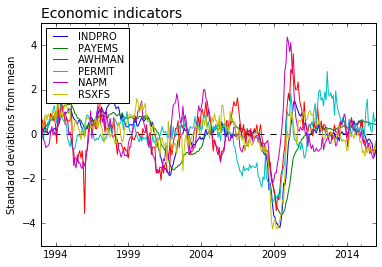

In [6]:
# plot 
fig, ax = plt.subplots()
gs.plot(ax=ax)
ax.set_title('Economic indicators', fontsize=14, loc='left')
ax.set_ylabel('Standard deviations from mean')
ax.set_xlabel('')
ax.hlines(y=0, xmin=start_date, xmax=end, linestyles='dashed')
#ax.legend().set_visible(False)
ax.legend(loc='upper left', fontsize=10, handlelength=2, labelspacing=0.15)

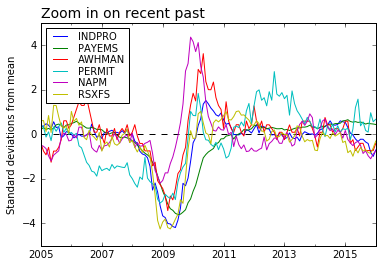

In [7]:
# focus on recent past 
recent_date = dt.datetime(2005, 1, 1)
grecent= gs[gs.index>=recent_date]

fig, ax = plt.subplots()
grecent.plot(ax=ax)
ax.set_title('Zoom in on recent past', fontsize=14, loc='left')
ax.set_ylabel('Standard deviations from mean')
ax.set_xlabel('')
ax.hlines(y=0, xmin=recent_date, xmax=end, linestyles='dashed')
ax.legend(loc='upper left', fontsize=10, handlelength=2, labelspacing=0.15)

**Question.** How do things look now?  

Keep in mind that zero is average, which has been pretty good on the whole.  Anything between -1 and +1 is ok:  it's within one standard deviation of the average.  

### Heatmap

See [StackOverflow](http://stackoverflow.com/questions/14391959/heatmap-in-matplotlib-with-pcolor)

**How would you fix this up?**

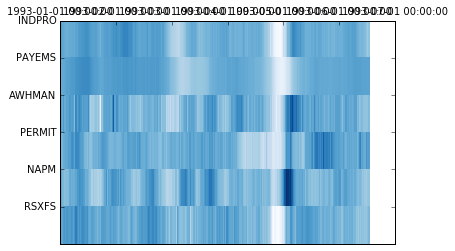

In [9]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(gs.T, cmap=plt.cm.Blues)

ax.invert_yaxis()
ax.xaxis.tick_top()
#ax.set_yticks(range(5)+0.5)

ax.set_xticklabels(gs.index, minor=False)
ax.set_yticklabels(gs.columns, minor=False)

### Radar plot ??

## Country indicators:  Opportunities in Southern Africa

Zambeef is a successful meat distributor located in [Zambia](https://www.google.com/maps/place/Zambia/@-12.9826533,18.8129711,5z/data=!3m1!4b1!4m2!3m1!1s0x1940f4a5fcfc0b71:0xf19ff9ac7e583e45).  Their leadership wonders whether their operation can be expanded to include neighboring Botswana and Tanzania.  We collect a number of economic and institutional indicators to assess the business climates in the three countries and ask:  

* What features of an economy are import to this business?
* What indicators of these features can we find in the World Bank's data?
* How do the three countries compare on these features?
* What locations look the most attractive to you?  

We start by looking through the [World Bank](http://data.worldbank.org/)'s enormous collection of country indicators and using Pandas' [World Bank API](http://pandas.pydata.org/pandas-docs/stable/remote_data.html#world-bank) to access the numbers.  

In [20]:
from pandas.io import wb               # World Bank api 

# read data from World Bank  
iso  = ['ZMB', 'BWA', 'TZA']           # country list (ISO codes)
var  = ['NY.GDP.PCAP.PP.KD',           # GDP per person 
        'SP.POP.TOTL',                 # population 
        'IC.BUS.EASE.XQ',              # ease of doing business (rank of 189)
        'IS.ROD.PAVE.ZS',              # paved roads (percent of total)
        'SE.ADT.LITR.ZS']              # adult literacy (15 and up)
year = 2014 
df = wb.download(indicator=var, country=iso, start=2005, end=2014)
df

C:\Users\dbackus\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\io\wb.py:161: UserWarning: 

Invalid Indicators:

IS.ROD.PAVE.ZS : No results from world bank.
  warnings.warn(bad_ind_msgs)


NY.GDP.PCAP.PP.KD  SP.POP.TOTL  IC.BUS.EASE.XQ  SE.ADT.LITR.ZS
country  year                                                                
Botswana 2014       15359.063168      2219937              72             NaN
         2013       15002.260140      2176510             NaN       87.320572
         2012       14004.073390      2132822             NaN             NaN
         2011       13634.267891      2089706             NaN             NaN
         2010       13119.555513      2047831             NaN             NaN
         2009       12329.220696      2007212             NaN             NaN
         2008       13617.811355      1967866             NaN             NaN
         2007       13066.276248      1930431             NaN             NaN
         2006       12288.370979      1895671             NaN             NaN
         2005       11532.571674      1864003             NaN             NaN
Tanzania 2014        2421.208020     51822621             140             NaN
         2013        2335.963263     50213457             NaN             NaN
         2012        2247.855226     48645709             NaN       78.982613
         2011        2206.910779     47122998             NaN             NaN
         2010        2111.195068     45648525             NaN       67.800697
         2009        2048.891202     44222113             NaN             NaN
         2008        2006.642789     42844744             NaN             NaN
         2007        1961.281530     41522004             NaN             NaN
         2006        1864.770405     40260847             NaN             NaN
         2005        1836.148929     39065600             NaN             NaN
Zambia   2014        3724.526564     15721343              91             NaN
         2013        3623.234879     15246086             NaN             NaN
         2012        3500.805039     14786581             NaN             NaN
         2011        3381.356194     14343526             NaN             NaN
         2010        3277.156719     13917439             NaN             NaN
         2009        3061.271808     13507849             NaN             NaN
         2008        2886.889612     13114579             NaN             NaN
         2007        2757.697705     12738676             NaN       61.428288
         2006        2618.536857     12381509             NaN             NaN
         2005        2494.824243     12043591             NaN             NaN

**Can we extract the most recent obs for each variable and country?**